In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# (x_train, y_train), (x_test,y_test)=keras.datasets.mnist.load_data()
df=pd.read_pickle("G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.data\\simulation_results\\jet_ml_benchmark_config_01_to_09_alpha_0.2_0.3_0.4_q0_1.5_2.0_2.5_MMAT_MLBT_size_100000_shuffled.pkl")

type(df)
dataset_x=df[0]
dataset_y=df[1]
dataset_x.shape

(100000, 32, 32)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset_x,dataset_y, test_size=0.2,random_state=25)

In [14]:
print ("x_train",x_train.shape,len(x_train))
print ("x_test",x_test.shape,len(x_test))


x_train (80000, 32, 32) 80000
x_test (20000, 32, 32) 20000


In [15]:
x_train[0].shape

(32, 32)

In [16]:
x_train[0]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.0124426, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0790065]])

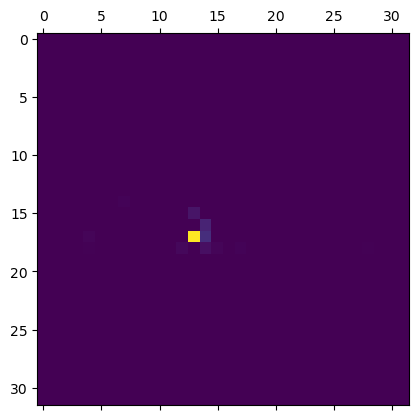

In [17]:
plt.matshow(x_train[1])

In [18]:
y_train[1]

array(['MMAT', '0.2', '1'], dtype='<U32')

In [19]:
y_train[:5]

array([['MMAT', '0.3', '1'],
       ['MMAT', '0.2', '1'],
       ['MMAT', '0.3', '1'],
       ['MLBT', '0.4', '2.0'],
       ['MLBT', '0.3', '2.5']], dtype='<U32')

In [24]:
x_train_item_shape=x_train[0].shape

In [29]:
from sklearn.preprocessing import OneHotEncoder


y_train_0_categorical = np.array(y_train[:,0]).reshape(-1, 1)
y_test_0_categorical = np.array(y_test[:,0]).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_train_0_categorical_encoded = encoder.fit_transform(y_train_0_categorical)
y_test_0_categorical_encoded = encoder.transform(y_test_0_categorical)

print ("y_train_0_categorical_encoded",y_train_0_categorical_encoded.shape,len(y_train_0_categorical_encoded))
print ("y_test_0_categorical_encoded",y_test_0_categorical_encoded.shape,len(y_test_0_categorical_encoded))

y_train_0_categorical_encoded (80000, 2) 80000
y_test_0_categorical_encoded (20000, 2) 20000


In [51]:
sgd_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/sgd",histogram_freq=1)
sgd_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )
sgd_model.fit(x_train,y_train_0_categorical_encoded,epochs=5,callbacks=[tb_callback])

Epoch 1/5
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6928 - accuracy: 0.5321
Epoch 2/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6927 - accuracy: 0.5495
Epoch 3/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6926 - accuracy: 0.5256
Epoch 4/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6926 - accuracy: 0.5396
Epoch 5/5
2500/2500 [==============================] - 9s 3ms/step - loss: 0.6926 - accuracy: 0.5420


In [52]:
adam_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)
adam_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )
adam_model.fit(x_train,y_train_0_categorical_encoded,epochs=5,callbacks=[tb_callback])

Epoch 1/5
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6374 - accuracy: 0.6544
Epoch 2/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.4774 - accuracy: 0.8235
Epoch 3/5
2500/2500 [==============================] - 7s 3ms/step - loss: 0.3884 - accuracy: 0.8538
Epoch 4/5
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3509 - accuracy: 0.8650
Epoch 5/5
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3318 - accuracy: 0.8718


In [49]:
%reload_ext tensorboard
# %load_ext tensorboard
%tensorboard --logdir logs/

Reusing TensorBoard on port 6009 (pid 12980), started 0:00:41 ago. (Use '!kill 12980' to kill it.)